In [1]:
import pandas as pd

In [2]:
file_path = "data_scrape\\merged_data.csv"
df = pd.read_csv(file_path)
df.head()

,asin,delivery,discount,image_url,original_price,price,prime,rating,reviews_count,sponsored,timestamp,title,url,category,page
0,B0DQXGCPFJ,NaN,(80% off),https://m.media-amazon.com/images/I/71W+dSyLXA...,"₹6,999","₹1,399",No,3.5,0,Yes,2025-03-08 15:59:54,Sponsored Ad - SIRGAWAIN Action Camera 1080P 1...,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,cameras,NaN
1,B0CVX3CXDB,NaN,(36% off),https://m.media-amazon.com/images/I/71Tdji2e5c...,"₹10,999","₹6,999",No,3.2,0,Yes,2025-03-08 15:59:54,Sponsored Ad - IZI Click Plus 5K 30FPS Budget ...,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,cameras,NaN
2,B0DQXGCPFJ,NaN,(80% off),https://m.media-amazon.com/images/I/71W+dSyLXA...,"₹6,999","₹1,399",No,3.5,0,No,2025-03-08 15:59:54,SIRGAWAIN Action Camera 1080P 12MP Sports Came...,https://www.amazon.in/SIRGAWAIN-Camera-Underwa...,cameras,NaN
3,B0CS6JDM78,NaN,(42% off),https://m.media-amazon.com/images/I/61ynVFrjIJ...,"₹25,990","₹14,990",No,4.2,0,No,2025-03-08 15:59:54,"DJI Action 2 Power Combo (128GB), Action Camer...",https://www.amazon.in/DJI-Super-Wide-Attachmen...,cameras,NaN
4,B0D32V55RP,NaN,(47% off),https://m.media-amazon.com/images/I/71qsysJOL6...,"₹16,990","₹8,998",No,4.7,0,No,2025-03-08 15:59:54,FitSpark Eagle i15 PRO MAX Real 4K30FPS Dual T...,https://www.amazon.in/FitSpark-EAGLE-i15-PRO-M...,cameras,NaN


In [3]:
df = df.drop(['page'], axis=1)

In [4]:
df.isna().sum()

asin                 0
delivery           962
discount           137
image_url            0
original_price      48
price               47
prime                0
rating             114
reviews_count       32
sponsored         1003
timestamp         2095
title                0
url                207
category             0
dtype: int64

In [5]:
df = df.drop(['sponsored', 'url', 'asin'], axis=1)

In [6]:
df.isna().sum()

delivery           962
discount           137
image_url            0
original_price      48
price               47
prime                0
rating             114
reviews_count       32
timestamp         2095
title                0
category             0
dtype: int64

In [7]:
df = df.drop(['delivery', 'original_price', 'timestamp', 'image_url'], axis=1)

In [8]:
df.isna().sum()

discount         137
price             47
prime              0
rating           114
reviews_count     32
title              0
category           0
dtype: int64

In [9]:
df.head()

,discount,price,prime,rating,reviews_count,title,category
0,(80% off),"₹1,399",No,3.5,0,Sponsored Ad - SIRGAWAIN Action Camera 1080P 1...,cameras
1,(36% off),"₹6,999",No,3.2,0,Sponsored Ad - IZI Click Plus 5K 30FPS Budget ...,cameras
2,(80% off),"₹1,399",No,3.5,0,SIRGAWAIN Action Camera 1080P 12MP Sports Came...,cameras
3,(42% off),"₹14,990",No,4.2,0,"DJI Action 2 Power Combo (128GB), Action Camer...",cameras
4,(47% off),"₹8,998",No,4.7,0,FitSpark Eagle i15 PRO MAX Real 4K30FPS Dual T...,cameras


CONTENT BASED FILTERING

Preprocessing data...
Creating content representation...
Building recommendation model...

Example Product (Index 1446):
Title: WOW Imagine Shock Proof Clear Back Case Mobile Cover for Samsung Galaxy M14 5G (Hard | Hybrid PC + TPU | Full Armour Device & Camera Protection | Black)
Price: $145.00
Rating: 4.1
Category: mobile_back_covers
Discount: 85.0%
Reviews Count: 1231.0

Getting recommendations...

Top 5 Recommended Products:

Recommendation 1 (Index 1446):
Title: WOW Imagine Shock Proof Clear Back Case Mobile Cover for Samsung Galaxy M14 5G (Hard | Hybrid PC + TPU | Full Armour Device & Camera Protection | Black)
Price: 145.0
Rating: 4.1
Category: mobile_back_covers
Discount: 85.0
Reviews_count: 1231.0
Similarity Score: 1.0000

Recommendation 2 (Index 1365):
Title: WOW IMAGINE Shock Proof Clear Back Case Mobile Cover for Realme GT Neo 3 5G (Hard | Hybrid PC + TPU | Full Armour Device & Camera Protection | Black)
Price: 195.0
Rating: 4.2
Category: mobile_back_covers
Discount: 80.0
Re

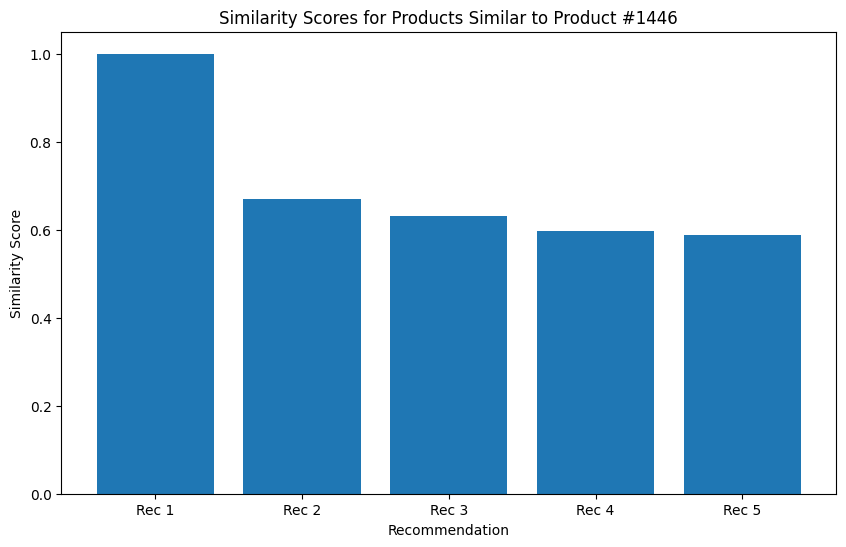

In [10]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import re
import string

# Simple text preprocessing function without NLTK
def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove extra whitespace
    text = ' '.join(text.split())
    
    # Simple stopwords list (common English stopwords)
    simple_stopwords = {
        'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while',
        'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
        'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from',
        'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',
        'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any',
        'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor',
        'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can',
        'will', 'just', 'don', 'should', 'now', 'i', 'me', 'my', 'myself', 'we',
        'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves',
        'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its',
        'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
        'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was',
        'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
        'did', 'doing', 'would', 'should', 'could', 'ought', 'i\'m', 'you\'re',
        'he\'s', 'she\'s', 'it\'s', 'we\'re', 'they\'re', 'i\'ve', 'you\'ve',
        'we\'ve', 'they\'ve', 'i\'d', 'you\'d', 'he\'d', 'she\'d', 'we\'d',
        'they\'d', 'i\'ll', 'you\'ll', 'he\'ll', 'she\'ll', 'we\'ll', 'they\'ll',
        'isn\'t', 'aren\'t', 'wasn\'t', 'weren\'t', 'hasn\'t', 'haven\'t', 'hadn\'t',
        'doesn\'t', 'don\'t', 'didn\'t', 'won\'t', 'wouldn\'t', 'shan\'t', 'shouldn\'t',
        'can\'t', 'cannot', 'couldn\'t', 'mustn\'t', 'let\'s', 'that\'s', 'who\'s',
        'what\'s', 'here\'s', 'there\'s', 'when\'s', 'where\'s', 'why\'s', 'how\'s'
    }
    
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in simple_stopwords])
    
    return text

# Data preprocessing
def preprocess_data(df):
    # Make a copy to avoid modifying the original dataframe
    df = df.copy()
    
    # Handle the 'discount' column
    df['discount'] = df['discount'].replace("No Discount", 0)
    df['discount'] = pd.to_numeric(df['discount'], errors='coerce')
    df['discount'] = df['discount'].fillna(0)
    
    # Fix price column - remove currency symbols and commas
    if df['price'].dtype == object:
        df['price'] = df['price'].replace('[\₹,$,£,€,]', '', regex=True).astype(str).str.replace(',', '')
        df['price'] = pd.to_numeric(df['price'], errors='coerce')
    df['price'] = df['price'].fillna(df['price'].median())
    
    # Ensure rating is numeric
    df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
    df['rating'] = df['rating'].fillna(df['rating'].median())
    
    # Fix reviews_count - ensure it's numeric
    df['reviews_count'] = pd.to_numeric(df['reviews_count'], errors='coerce')
    df['reviews_count'] = df['reviews_count'].fillna(0)
    
    # Clean and preprocess the title
    df['processed_title'] = df['title'].apply(preprocess_text)
    
    return df

# Create a comprehensive content representation
def create_content_representation(df):
    # Create numerical features representation
    def create_feature_soup(row):
        features = []
        
        # Add prime status
        prime_status = 'prime' if row.get('prime') == 1 else 'not_prime'
        features.append(prime_status)
        
        # Add category information directly
        if isinstance(row.get('category'), str):
            category = row.get('category').lower().replace(' ', '_')
            features.append(f"category_{category}")
        
        # Add price range as a feature
        if row['price'] < 500:
            price_range = 'budget_price'
        elif row['price'] < 7500:
            price_range = 'mid_price'
        else:
            price_range = 'premium_price'
        features.append(price_range)
        
        # Add rating range as a feature
        if row['rating'] >= 4.5:
            rating_range = 'top_rated'
        elif row['rating'] >= 4.0:
            rating_range = 'highly_rated'
        elif row['rating'] >= 3.0:
            rating_range = 'average_rated'
        else:
            rating_range = 'low_rated'
        features.append(rating_range)
        
        # Add discount range
        if row['discount'] >= 30:
            discount_range = 'high_discount'
        elif row['discount'] >= 10:
            discount_range = 'medium_discount'
        else:
            discount_range = 'low_discount'
        features.append(discount_range)
        
        # Add popularity based on reviews count
        if row['reviews_count'] > 1000:
            popularity = 'very_popular'
        elif row['reviews_count'] > 100:
            popularity = 'popular'
        else:
            popularity = 'less_popular'
        features.append(popularity)
        
        return ' '.join(features)
    
    # Apply feature extraction for numerical and categorical features
    df['feature_soup'] = df.apply(create_feature_soup, axis=1)
    
    return df

# Extract important terms from title that are likely relevant for cameras
def extract_camera_terms(title):
    if not isinstance(title, str):
        return ""
    
    # Camera-specific terms to emphasize
    camera_terms = [
        'dslr', 'mirrorless', 'canon', 'nikon', 'sony', 'fujifilm', 'olympus', 'panasonic',
        'lens', 'mm', 'zoom', 'wide', 'angle', 'telephoto', 'macro', 'portrait',
        'megapixel', 'mp', 'sensor', 'cmos', 'full-frame', 'full frame', 'aps-c',
        '4k', 'hd', 'video', 'recording', 'stabilization', 'stabilized', 'optical',
        'digital', 'slr', 'point-and-shoot', 'compact', 'action', 'gopro', 'waterproof',
        'wifi', 'bluetooth', 'memory', 'card', 'battery', 'shutter', 'iso', 'flash'
    ]
    
    # Convert title to lowercase
    title_lower = title.lower()
    
    # Extract camera terms that appear in the title
    found_terms = []
    for term in camera_terms:
        if term in title_lower:
            found_terms.append(term)
    
    # Also extract model numbers (patterns like "A7III", "5D Mark IV", "D850", etc.)
    model_patterns = [
        r'\b[a-z]+\d+[a-z]*\b',    # like A7III, D850, X100F
        r'\b\d+[a-z]+\b',          # like 5DS, 7D
        r'\bmark\s+[ivx]+\b',      # like Mark IV, Mark III
    ]
    
    for pattern in model_patterns:
        matches = re.findall(pattern, title_lower)
        found_terms.extend(matches)
    
    return ' '.join(found_terms)

# Build the recommendation model
def build_recommendation_model(df):
    # Check if we have the processed title column
    if 'processed_title' not in df.columns:
        df['processed_title'] = df['title'].apply(preprocess_text)
    
    # Extract camera-specific terms from titles
    df['camera_terms'] = df['title'].apply(extract_camera_terms)
    
    # Create TF-IDF vectorizer for title text
    title_tfidf = TfidfVectorizer(
        max_features=5000,
        stop_words='english',
        ngram_range=(1, 2)  # Include both unigrams and bigrams
    )
    title_tfidf_matrix = title_tfidf.fit_transform(df['processed_title'])
    
    # Create TF-IDF vectorizer for camera-specific terms
    camera_tfidf = TfidfVectorizer(stop_words='english')
    
    # Check if we have any camera terms extracted
    if df['camera_terms'].str.strip().str.len().sum() > 0:
        camera_tfidf_matrix = camera_tfidf.fit_transform(df['camera_terms'])
        has_camera_terms = True
    else:
        # If no camera terms found, use a dummy matrix
        camera_tfidf_matrix = title_tfidf_matrix.copy()
        has_camera_terms = False
    
    # Create TF-IDF vectorizer for feature soup
    feature_tfidf = TfidfVectorizer(stop_words='english')
    feature_tfidf_matrix = feature_tfidf.fit_transform(df['feature_soup'])
    
    # Calculate similarity matrices
    title_sim = cosine_similarity(title_tfidf_matrix, title_tfidf_matrix)
    feature_sim = cosine_similarity(feature_tfidf_matrix, feature_tfidf_matrix)
    
    # If we have camera terms, include them in the combined similarity
    if has_camera_terms:
        camera_sim = cosine_similarity(camera_tfidf_matrix, camera_tfidf_matrix)
        # Weight: 50% title, 30% camera-specific terms, 20% other features
        combined_sim = 0.5 * title_sim + 0.3 * camera_sim + 0.2 * feature_sim
    else:
        # Without camera terms: 70% title, 30% other features
        combined_sim = 0.7 * title_sim + 0.3 * feature_sim
    
    return combined_sim

# Get recommendations function
def get_recommendations(product_idx, cosine_sim, df, top_n=5):
    """
    Get recommendations for a product based on its index
    
    Parameters:
    product_idx (int): Index of the product in the dataframe
    cosine_sim (numpy.ndarray): Cosine similarity matrix
    df (pandas.DataFrame): DataFrame containing product information
    top_n (int): Number of recommendations to return
    
    Returns:
    pandas.DataFrame: Recommended products with similarity scores
    """
    try:
        # Ensure index is within range
        if product_idx < 0 or product_idx >= len(df):
            print(f"Product index {product_idx} is out of range (0-{len(df)-1}).")
            return pd.DataFrame()
            
        # Get similarity scores with other products
        sim_scores = list(enumerate(cosine_sim[product_idx]))
        
        # Sort products based on similarity scores
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        
        # Get top N most similar products (excluding itself)
        sim_scores = sim_scores[1:top_n+1]
        
        # Get product indices
        product_indices = [i[0] for i in sim_scores]
        
        # Return recommended products with similarity scores
        columns_to_include = ['title', 'price', 'rating', 'category', 'discount', 'reviews_count']
        available_columns = [col for col in columns_to_include if col in df.columns]
        
        recommendations = df.iloc[product_indices][available_columns].copy()
        recommendations['similarity_score'] = [score for _, score in sim_scores]
        recommendations['product_index'] = product_indices  # Add index for reference
        
        return recommendations
    except Exception as e:
        print(f"Error getting recommendations: {e}")
        return pd.DataFrame()

# Main function to run the entire recommendation pipeline
def run_recommendation_system(df, sample_idx=None, top_n=5):
    # Preprocess the data
    print("Preprocessing data...")
    processed_df = preprocess_data(df)
    
    # Create content representation
    print("Creating content representation...")
    content_df = create_content_representation(processed_df)
    
    # Build recommendation model
    print("Building recommendation model...")
    combined_sim = build_recommendation_model(content_df)
    
    # If no sample index is provided, select a random product
    if sample_idx is None:
        sample_idx = np.random.randint(0, len(content_df))
    
    # Display the sample product details
    sample_product = content_df.iloc[sample_idx]
    
    print("\nExample Product (Index {}):".format(sample_idx))
    if 'title' in sample_product:
        print(f"Title: {sample_product['title']}")
    if 'price' in sample_product:
        print(f"Price: ${sample_product['price']:.2f}")
    if 'rating' in sample_product:
        print(f"Rating: {sample_product['rating']}")
    if 'category' in sample_product:
        print(f"Category: {sample_product['category']}")
    if 'discount' in sample_product:
        print(f"Discount: {sample_product['discount']}%")
    if 'reviews_count' in sample_product:
        print(f"Reviews Count: {sample_product['reviews_count']}")
    
    # Get recommendations for the sample product
    print("\nGetting recommendations...")
    recommendations = get_recommendations(sample_idx, combined_sim, content_df, top_n=top_n)
    
    # Display recommendations
    print("\nTop {} Recommended Products:".format(top_n))
    for i, (_, recommendation) in enumerate(recommendations.iterrows(), 1):
        print(f"\nRecommendation {i} (Index {recommendation['product_index']}):")
        
        for col in recommendations.columns:
            if col not in ['similarity_score', 'product_index']:
                print(f"{col.capitalize()}: {recommendation[col]}")
        
        print(f"Similarity Score: {recommendation['similarity_score']:.4f}")
    
    # Visualize the recommendations similarity
    plt.figure(figsize=(10, 6))
    similarity_scores = recommendations['similarity_score'].values
    plt.bar(range(len(similarity_scores)), similarity_scores)
    plt.xlabel('Recommendation')
    plt.ylabel('Similarity Score')
    plt.title(f'Similarity Scores for Products Similar to Product #{sample_idx}')
    plt.xticks(range(len(similarity_scores)), [f'Rec {i+1}' for i in range(len(similarity_scores))])
    plt.savefig('recommendation_similarity.png')
    print("\nRecommendation similarity visualization saved as 'recommendation_similarity.png'")
    
    return recommendations, combined_sim

# Function to search for products and get recommendations
def search_and_recommend(df, query, top_n=5):
    """
    Search for products matching a query and recommend similar products
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing product information
    query (str): Search query (e.g., "Canon camera")
    top_n (int): Number of recommendations to return
    
    Returns:
    tuple: (search_results, recommendations)
    """
    # Preprocess the data if not already done
    if 'processed_title' not in df.columns:
        df = preprocess_data(df)
        df = create_content_representation(df)
    
    # Preprocess the query
    processed_query = preprocess_text(query)
    
    # Create a TF-IDF vectorizer for the search
    search_tfidf = TfidfVectorizer(stop_words='english')
    title_matrix = search_tfidf.fit_transform(df['processed_title'])
    
    # Convert query to vector
    query_vector = search_tfidf.transform([processed_query])
    
    # Calculate similarity scores
    similarity_scores = cosine_similarity(query_vector, title_matrix).flatten()
    
    # Get top search results
    top_indices = similarity_scores.argsort()[-top_n:][::-1]
    
    columns_to_include = ['title', 'price', 'rating', 'category', 'discount', 'reviews_count']
    available_columns = [col for col in columns_to_include if col in df.columns]
    
    search_results = df.iloc[top_indices][available_columns].copy()
    search_results['search_score'] = similarity_scores[top_indices]
    
    # If we found at least one result, get recommendations for the top match
    if len(top_indices) > 0:
        # Build recommendation model
        combined_sim = build_recommendation_model(df)
        
        # Get recommendations for the top search result
        recommendations = get_recommendations(top_indices[0], combined_sim, df, top_n)
        return search_results, recommendations
    else:
        return search_results, pd.DataFrame()

# Example code to load data and run the recommendation system
# """
# # Assuming you have a CSV file with your data
# df = pd.read_csv('your_data.csv')

# # Run the recommendation system
recommendations, similarity_matrix = run_recommendation_system(df)

# # Or search for camera products and get recommendations
search_results, recommendations = search_and_recommend(df, "canon dslr camera")
# """

COLLABORATIVE FILTERING

In [13]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Define category-specific complementary relationships
CATEGORY_RELATIONSHIPS = {
    'laptops': ['keyboards', 'headphones'],
    'phones': ['mobile back covers', 'headphones'],
    'cameras': ['headphones'],
    'tv': ['headphones'],
    'printers': ['laptops'],
    'keyboards': ['laptops'],
    'mobile back covers': ['phones'],
    'headphones': ['phones', 'laptops', 'tv', 'cameras']
}

# Function to categorize products
def categorize_products(df):
    """
    Add category information if not already present, based on product title
    """
    if 'category' in df.columns:
        return df
    
    category_keywords = {
        'laptops': ['laptop', 'notebook', 'macbook', 'thinkpad', 'ideapad', 'ultrabook'],
        'keyboards': ['keyboard', 'mechanical keyboard', 'gaming keyboard', 'wireless keyboard'],
        'headphones': ['headphone', 'earphone', 'earbud', 'headset', 'earpiece'],
        'phones': ['phone', 'smartphone', 'iphone', 'android', 'mobile phone', 'cell phone'],
        'mobile back covers': ['phone case', 'back cover', 'phone cover', 'mobile case', 'phone shell'],
        'cameras': ['camera', 'dslr', 'mirrorless', 'digital camera', 'action camera', 'point and shoot'],
        'printers': ['printer', 'laser printer', 'inkjet', 'all-in-one printer'],
        'tv': ['tv', 'television', 'smart tv', 'led tv', 'oled', 'qled', 'lcd tv']
    }
    
    def detect_category(title):
        if not isinstance(title, str):
            return 'unknown'
            
        title_lower = title.lower()
        for category, keywords in category_keywords.items():
            for keyword in keywords:
                if keyword in title_lower:
                    return category
        return 'unknown'
    
    df['category'] = df['title'].apply(detect_category)
    return df

# Function to simulate transaction data based on your specific product categories
def simulate_category_based_transactions(df, num_transactions=1000):
    """
    Simulate transaction data based on predefined category relationships
    """
    # Ensure we have category information
    df = categorize_products(df)
    
    # Create category-to-products mapping
    category_to_products = {}
    for idx, row in df.iterrows():
        category = row.get('category', 'unknown')
        if category not in category_to_products:
            category_to_products[category] = []
        category_to_products[category].append(idx)
    
    # Simulate transactions
    transactions = []
    for i in range(num_transactions):
        transaction_id = f'T{i+1}'
        
        # Select a random primary category
        primary_category = np.random.choice(list(CATEGORY_RELATIONSHIPS.keys()))
        
        # Skip if no products in this category
        if primary_category not in category_to_products or not category_to_products[primary_category]:
            continue
            
        # Select a primary product
        primary_product = np.random.choice(category_to_products[primary_category])
        transactions.append({
            'transaction_id': transaction_id,
            'product_id': primary_product,
            'quantity': 1
        })
        
        # Add complementary products based on category relationships
        if primary_category in CATEGORY_RELATIONSHIPS:
            for comp_category in CATEGORY_RELATIONSHIPS[primary_category]:
                # Only add if we have products in this category and with 70% probability
                if comp_category in category_to_products and category_to_products[comp_category] and np.random.random() < 0.7:
                    comp_product = np.random.choice(category_to_products[comp_category])
                    transactions.append({
                        'transaction_id': transaction_id,
                        'product_id': comp_product,
                        'quantity': 1
                    })
    
    return pd.DataFrame(transactions)

# Function to build complementary product model with category awareness
def build_category_aware_complementary_model(df, transaction_data=None):
    """
    Build a model for complementary product recommendations with category awareness
    
    Parameters:
    df (pandas.DataFrame): DataFrame with product information
    transaction_data (pandas.DataFrame, optional): Transaction data if available
    
    Returns:
    dict: Dictionary mapping product IDs to recommended complementary product IDs
    """
    # Ensure we have category information
    df = categorize_products(df)
    
    # If no transaction data provided, simulate it
    if transaction_data is None:
        transaction_data = simulate_category_based_transactions(df)
    
    # Check if we have enough transaction data
    if len(transaction_data) < 10:
        print("Warning: Not enough transaction data for reliable association rules.")
        # Fall back to category-based recommendations
        return build_fallback_category_model(df)
    
    try:
        # Create a one-hot encoded matrix for products in transactions
        basket = (transaction_data
                 .groupby(['transaction_id', 'product_id'])['quantity']
                 .sum().unstack().reset_index().fillna(0)
                 .set_index('transaction_id'))
        
        # Convert to binary (purchased or not)
        basket_binary = basket.applymap(lambda x: 1 if x > 0 else 0)
        
        # Run the Apriori algorithm to find frequent itemsets
        frequent_itemsets = apriori(basket_binary, min_support=0.01, use_colnames=True)
        
        # Generate association rules if we have frequent itemsets
        if len(frequent_itemsets) > 0:
            rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
            
            # Sort by lift
            rules = rules.sort_values('lift', ascending=False)
            
            # Create a lookup dictionary for complementary products
            complementary_dict = {}
            for _, row in rules.iterrows():
                antecedent = frozenset(row['antecedents'])
                consequent = frozenset(row['consequents'])
                
                # Only consider rules with single antecedent and consequent
                if len(antecedent) == 1 and len(consequent) == 1:
                    antecedent_item = list(antecedent)[0]
                    consequent_item = list(consequent)[0]
                    
                    if antecedent_item not in complementary_dict:
                        complementary_dict[antecedent_item] = []
                    
                    complementary_dict[antecedent_item].append({
                        'product_id': consequent_item,
                        'lift': row['lift'],
                        'confidence': row['confidence']
                    })
            
            return complementary_dict
        else:
            print("No frequent itemsets found. Using fallback category model.")
            return build_fallback_category_model(df)
            
    except Exception as e:
        print(f"Error building association rules: {e}")
        return build_fallback_category_model(df)

# Fallback method using predefined category relationships
def build_fallback_category_model(df):
    """
    Build a fallback complementary product model based on category relationships
    when transaction data is insufficient
    """
    complementary_dict = {}
    
    # For each product, find complementary products from related categories
    for idx, row in df.iterrows():
        product_category = row.get('category', 'unknown')
        
        # Skip if unknown category or no complementary categories defined
        if product_category == 'unknown' or product_category not in CATEGORY_RELATIONSHIPS:
            continue
        
        complementary_dict[idx] = []
        
        # Find products from complementary categories
        for comp_category in CATEGORY_RELATIONSHIPS[product_category]:
            comp_products = df[df['category'] == comp_category]
            
            # Skip if no products in this category
            if len(comp_products) == 0:
                continue
                
            # Add top 3 products from each complementary category (based on rating or reviews)
            if 'rating' in comp_products.columns:
                top_products = comp_products.sort_values('rating', ascending=False).head(3)
            elif 'reviews_count' in comp_products.columns:
                top_products = comp_products.sort_values('reviews_count', ascending=False).head(3)
            else:
                top_products = comp_products.head(3)
            
            for comp_idx, comp_row in top_products.iterrows():
                # Don't recommend the same product
                if comp_idx == idx:
                    continue
                    
                complementary_dict[idx].append({
                    'product_id': comp_idx,
                    'lift': 2.0,  # Default lift score
                    'confidence': 0.7  # Default confidence
                })
    
    return complementary_dict

# Function to get complementary recommendations
def get_category_complementary_recommendations(product_idx, df, complementary_dict=None, top_n=3):
    """
    Get complementary product recommendations with category awareness
    
    Parameters:
    product_idx (int): Index of the product
    df (pandas.DataFrame): DataFrame with product information
    complementary_dict (dict, optional): Pre-built complementary product dictionary
    top_n (int): Number of recommendations to return
    
    Returns:
    pandas.DataFrame: Complementary product recommendations
    """
    # Ensure we have category information
    df = categorize_products(df)
    
    # If no complementary dictionary provided, build it
    if complementary_dict is None:
        complementary_dict = build_category_aware_complementary_model(df)
    
    # If product has complementary products in the dictionary
    if product_idx in complementary_dict and complementary_dict[product_idx]:
        # Get complementary products sorted by lift
        comp_products = sorted(complementary_dict[product_idx], 
                              key=lambda x: x['lift'], 
                              reverse=True)[:top_n]
        
        # Get product indices
        product_indices = [item['product_id'] for item in comp_products]
        
    else:
        # Fallback: Use category relationships directly
        product_category = df.loc[product_idx, 'category'] if product_idx in df.index else 'unknown'
        
        if product_category in CATEGORY_RELATIONSHIPS:
            complementary_categories = CATEGORY_RELATIONSHIPS[product_category]
            
            # Find products from complementary categories
            comp_products_df = df[df['category'].isin(complementary_categories)]
            
            # Sort by rating or reviews if available
            if 'rating' in comp_products_df.columns:
                comp_products_df = comp_products_df.sort_values('rating', ascending=False)
            elif 'reviews_count' in comp_products_df.columns:
                comp_products_df = comp_products_df.sort_values('reviews_count', ascending=False)
            
            # Get top products
            product_indices = comp_products_df.head(top_n).index.tolist()
            
            # Create fake lift and confidence scores
            comp_products = [{'product_id': pid, 'lift': 2.0, 'confidence': 0.7} for pid in product_indices]
        else:
            # No category relationship found
            return pd.DataFrame()
    
    # Return recommended products
    if not product_indices:
        return pd.DataFrame()
    
    columns_to_include = ['title', 'price', 'rating', 'category', 'discount', 'reviews_count']
    available_columns = [col for col in columns_to_include if col in df.columns]
    
    recommendations = df.loc[product_indices][available_columns].copy()
    recommendations['lift_score'] = [item['lift'] for item in comp_products]
    recommendations['confidence'] = [item['confidence'] for item in comp_products]
    recommendations['product_index'] = product_indices
    recommendations['recommendation_type'] = 'complementary'
    
    return recommendations

# Main function to run enhanced recommendation system
def run_category_enhanced_recommendations(df, product_idx=None, similar_count=3, complementary_count=2):
    """
    Get recommendations with both similarity-based and category-based complementary products
    
    Parameters:
    df (pandas.DataFrame): DataFrame with product information
    product_idx (int, optional): Product index to recommend for. If None, selects a random product.
    similar_count (int): Number of similar products to recommend
    complementary_count (int): Number of complementary products to recommend
    
    Returns:
    tuple: (similar_recommendations, complementary_recommendations)
    """
    # Preprocess data if needed (assuming preprocess_data and create_content_representation
    # functions are defined elsewhere in your code)
    if 'processed_title' not in df.columns and 'preprocess_data' in globals():
        df = preprocess_data(df)
        df = create_content_representation(df)
    
    # Ensure we have category information
    df = categorize_products(df)
    
    # Select a random product if none specified
    if product_idx is None or product_idx not in df.index:
        product_idx = np.random.choice(df.index)
    
    # Display selected product
    product = df.loc[product_idx]
    print(f"\nSelected Product (Index {product_idx}):")
    for col in ['title', 'price', 'rating', 'category']:
        if col in product:
            print(f"{col.capitalize()}: {product[col]}")
    
    # Get similar product recommendations
    similar_recs = pd.DataFrame()
    if 'build_recommendation_model' in globals():
        # Build similarity matrix if not available
        similarity_matrix = build_recommendation_model(df)
        similar_recs = get_recommendations(product_idx, similarity_matrix, df, top_n=similar_count)
    else:
        # Fallback method if similarity functions not available
        print("Similar product recommendation functions not available. Implementing basic similarity.")
        similar_recs = get_fallback_similar_recommendations(product_idx, df, top_n=similar_count)
    
    # Get complementary product recommendations
    complementary_dict = build_category_aware_complementary_model(df)
    comp_recs = get_category_complementary_recommendations(
        product_idx, df, complementary_dict, top_n=complementary_count
    )
    
    # Display results
    print("\nSimilar Products:")
    if not similar_recs.empty:
        for i, (_, rec) in enumerate(similar_recs.iterrows(), 1):
            print(f"\n{i}. {rec.get('title', f'Product {rec.name}')}")
            for col in ['price', 'rating', 'category']:
                if col in rec:
                    print(f"   {col.capitalize()}: {rec[col]}")
            if 'similarity_score' in rec:
                print(f"   Similarity: {rec['similarity_score']:.4f}")
    else:
        print("No similar products found")
    
    print("\nFrequently Bought Together:")
    if not comp_recs.empty:
        for i, (_, rec) in enumerate(comp_recs.iterrows(), 1):
            print(f"\n{i}. {rec.get('title', f'Product {rec.name}')}")
            for col in ['price', 'rating', 'category']:
                if col in rec:
                    print(f"   {col.capitalize()}: {rec[col]}")
            if 'lift_score' in rec:
                print(f"   Relevance: {rec['lift_score']:.4f}")
    else:
        print("No complementary products found")
    
    return similar_recs, comp_recs

# Fallback similar product recommendation if your original functions are not available
def get_fallback_similar_recommendations(product_idx, df, top_n=3):
    """
    Fallback method to find similar products if main similarity functions are not available
    """
    # Ensure product_idx is in the DataFrame
    if product_idx not in df.index:
        return pd.DataFrame()
    
    # Get the product category
    product = df.loc[product_idx]
    product_category = product.get('category', 'unknown')
    
    # Find products in the same category
    category_products = df[df['category'] == product_category]
    
    # Exclude the query product
    category_products = category_products[category_products.index != product_idx]
    
    # If we have TF-IDF capability, use it for title similarity
    if 'TfidfVectorizer' in globals():
        # Create a basic TF-IDF for titles
        if 'title' in df.columns:
            tfidf = TfidfVectorizer(stop_words='english')
            title_matrix = tfidf.fit_transform(df['title'].fillna('').astype(str))
            
            # Get similarity scores
            product_vector = title_matrix[df.index.get_loc(product_idx)]
            similarity_scores = cosine_similarity(product_vector, title_matrix).flatten()
            
            # Sort by similarity
            similar_indices = similarity_scores.argsort()[::-1][1:top_n+1]  # Exclude itself
            similar_products = df.iloc[similar_indices].copy()
            similar_products['similarity_score'] = similarity_scores[similar_indices]
            
            return similar_products
    
    # Otherwise, sort by rating or reviews if available
    if len(category_products) >= top_n:
        if 'rating' in category_products.columns:
            similar_products = category_products.sort_values('rating', ascending=False).head(top_n)
        elif 'reviews_count' in category_products.columns:
            similar_products = category_products.sort_values('reviews_count', ascending=False).head(top_n)
        else:
            similar_products = category_products.head(top_n)
        
        # Add a dummy similarity score
        similar_products = similar_products.copy()
        similar_products['similarity_score'] = 0.8  # Default similarity
        
        return similar_products
    
    return pd.DataFrame()

# Example usage
similar_recs, comp_recs = run_category_enhanced_recommendations(df)


Selected Product (Index 588):
Title: soundcore by Anker Pyro Mini Portable and Compact 6W Bluetooth Speaker with Loud and Strong bass, 10 Hrs Playtime, 57mm Driver, Bluetooth 5.3 Connectivity- Black
Price: 599.0
Rating: 4.0
Category: headphones


C:\Users\Vinay Venkatachalam\AppData\Local\Temp\ipykernel_21852\2512665930.py:135: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_binary = basket.applymap(lambda x: 1 if x > 0 else 0)



Similar Products:

1. soundcore by Anker H30i Wireless On-Ear Headphones, Foldable Design, Pure Bass, 70H Playtime, Bluetooth 5.3, Lightweight and Comfortable, App Connectivity, Multipoint Connection (Black)
   Price: 2999.0
   Rating: 4.2
   Category: headphones
   Similarity: 0.3820

2. soundcore by Anker H30i Wireless On-Ear Headphones, Foldable Design, Pure Bass, 70H Playtime, Bluetooth 5.3, Lightweight and Comfortable, App Connectivity, Multipoint Connection (Black)
   Price: 2999.0
   Rating: 4.2
   Category: headphones
   Similarity: 0.3661

3. Amkette Optimus BT 4 in 1 Wireless Keyboard 2.4 GHz & Bluetooth 5.0 Connectivity with 3 Bluetooth and 1 USB Device, Compact Bluetooth Keyboard, On/Off Switch, Silent Keys, Shortcut Multimedia Keys
   Price: 899.0
   Rating: 4.0
   Category: keyboards
   Similarity: 0.3429

Frequently Bought Together:

1. Sponsored Ad - Elevea 𝟏𝟓 𝐘𝐞𝐚𝐫𝐬 𝐖𝐚𝐫𝐫𝐚𝐧𝐭𝐲 4K HD 1080 Action Camera, Dual 2 Inch LCD Screen 16 MP, Image Sensor 170 Wide-Angle Lens Sports

C:\Users\Vinay Venkatachalam\AppData\Roaming\Python\Python313\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


VISUAL SEARCH

In [ ]:
import pandas as pd
import os
import requests
from tqdm import tqdm
import hashlib  # For duplicate detection

# Load dataset
df = pd.read_csv("/content/merged_data.csv")

# Create a directory to save images
image_dir = "downloaded_images"
os.makedirs(image_dir, exist_ok=True)

# Track downloaded ASINs to avoid duplicates
downloaded_asins = set()
file_hashes = {}  # To track duplicate image content

# Function to download an image
def download_image(image_url, save_path):
    try:
        response = requests.get(image_url, timeout=5)
        response.raise_for_status()
        
        # Calculate hash of image content to detect duplicates
        content = response.content
        image_hash = hashlib.md5(content).hexdigest()
        
        # Check if we've seen this exact image before
        if image_hash in file_hashes:
            print(f"Duplicate image content detected: {save_path} matches {file_hashes[image_hash]}")
            return False
        
        # Save the new image
        with open(save_path, "wb") as file:
            file.write(content)
        
        # Record this hash
        file_hashes[image_hash] = save_path
        return True
    except Exception as e:
        print(f"Failed to download {image_url}: {e}")
        return False

# Loop through image URLs and download images
successful_downloads = 0
for idx, row in tqdm(df.iterrows(), total=len(df), desc="Downloading Images"):
    image_url = row["image_url"]
    
    # Check if we have an ASIN column, otherwise skip
    if "asin" not in row or pd.isna(row["asin"]):
        print(f"Row {idx} missing ASIN, skipping")
        continue
    
    asin = row["asin"]
    
    # Skip if we've already downloaded this ASIN
    if asin in downloaded_asins:
        print(f"Skipping duplicate ASIN: {asin}")
        continue
    
    # Generate filename with ASIN
    image_name = f"{asin}.jpg"
    save_path = os.path.join(image_dir, image_name)
    
    if pd.notna(image_url):  # Check if URL is not NaN
        if download_image(image_url, save_path):
            downloaded_asins.add(asin)  # Mark this ASIN as downloaded
            successful_downloads += 1

print(f"✅ Image download complete! {successful_downloads} unique images saved in 'downloaded_images' folder.")
print(f"Prevented {len(df) - successful_downloads} duplicate or failed downloads.")

In [ ]:
import os
import numpy as np
import pandas as pd
import pickle
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
import re

class ProductVisualSearch:
    def __init__(self, images_directory, product_data_path):
        """
        Initialize the visual search system
        
        Args:
            images_directory: Path to directory containing product images
            product_data_path: Path to CSV file containing product metadata
        """
        self.images_directory = images_directory
        
        # Load product metadata
        self.product_data = pd.read_csv(product_data_path)
        print(f"Loaded product data with {len(self.product_data)} entries")
        
        # Load pre-trained ResNet50 model without the top classification layer
        base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
        self.model = Model(inputs=base_model.input, outputs=base_model.output)
        
        # Set parameters
        self.img_size = (224, 224)  # ResNet50 expected input size
        
        # Storage for image features, paths, and ASINs
        self.features = []
        self.image_paths = []
        self.asins = []
        
        # Scan and index all images in the directory
        self._index_images()
    
    def _extract_asin(self, filename):
        """Extract ASIN from filename"""
        # Assuming filename format is ASIN.jpg (e.g., B0DQXGCPFJ.jpg)
        asin = os.path.splitext(filename)[0]
        # Verify it looks like an ASIN (typically 10 characters, alphanumeric)
        if re.match(r'^[A-Z0-9]{10}$', asin):
            return asin
        return None
    
    def _index_images(self):
        """Scan the images directory and extract features from all images"""
        print(f"Indexing images from {self.images_directory}...")
        
        valid_extensions = ('.jpg', '.jpeg', '.png')
        count = 0
        
        for filename in os.listdir(self.images_directory):
            if filename.lower().endswith(valid_extensions):
                img_path = os.path.join(self.images_directory, filename)
                
                # Extract ASIN from filename
                asin = self._extract_asin(filename)
                if not asin:
                    print(f"Skipping {filename}: Could not extract valid ASIN")
                    continue
                
                try:
                    # Extract features
                    feature = self._extract_features(img_path)
                    
                    # Store feature, path, and ASIN
                    self.features.append(feature)
                    self.image_paths.append(img_path)
                    self.asins.append(asin)
                    
                    count += 1
                    if count % 10 == 0:
                        print(f"Processed {count} images")
                        
                except Exception as e:
                    print(f"Error processing {filename}: {e}")
        
        # Convert features list to numpy array for faster processing
        self.features = np.array(self.features)
        print(f"Indexed {len(self.features)} images successfully")
    
    def _extract_features(self, img_path):
        """
        Extract features from a single image using the pre-trained model
        
        Args:
            img_path: Path to the image file
            
        Returns:
            Feature vector for the image
        """
        # Load and preprocess image
        img = image.load_img(img_path, target_size=self.img_size)
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        
        # Extract features - with ResNet50 and avg pooling, features are already flattened
        features = self.model.predict(img_array, verbose=0)[0]
        
        # Normalize the features
        features_normalized = features / np.linalg.norm(features)
        
        return features_normalized
    
    def get_product_info(self, asin):
        """Get product metadata for a given ASIN"""
        product = self.product_data[self.product_data['asin'] == asin]
        if len(product) == 0:
            return {
                'title': f"Product {asin}",
                'price': "N/A",
                'rating': "N/A",
                'category': "N/A",
                'asin': asin
            }
        
        # Return first matching product
        product = product.iloc[0]
        return {
            'title': product.get('title', f"Product {asin}"),
            'price': product.get('price', "N/A"),
            'rating': product.get('rating', "N/A"),
            'category': product.get('category', "N/A"),
            'asin': asin
        }
    
    def search(self, query_img_path, top_k=5):
        """
        Search for similar images to the query image
        
        Args:
            query_img_path: Path to the query image
            top_k: Number of top results to return
            
        Returns:
            List of (image_path, asin, product_info, similarity_score) tuples for top matches
        """
        # Extract features from query image
        query_features = self._extract_features(query_img_path)
        
        # Calculate similarity scores
        similarities = cosine_similarity(query_features.reshape(1, -1), self.features)
        similarities = similarities[0]
        
        # Get indices of top-k most similar images
        top_indices = np.argsort(similarities)[::-1][:top_k]
        
        # Create result list with image paths, ASINs, product info, and similarity scores
        results = []
        for i in top_indices:
            asin = self.asins[i]
            product_info = self.get_product_info(asin)
            results.append((self.image_paths[i], asin, product_info, similarities[i]))
        
        return results
    
    def visualize_results(self, query_img_path, results):
        """
        Visualize search results with product information
        
        Args:
            query_img_path: Path to the query image
            results: List of (image_path, asin, product_info, similarity_score) tuples
        """
        n_results = len(results)
        plt.figure(figsize=(18, 4 + n_results * 4))
        
        # Extract ASIN from query image if available
        query_asin = self._extract_asin(os.path.basename(query_img_path))
        query_info = None
        if query_asin:
            query_info = self.get_product_info(query_asin)
        
        # Display query image with product info if available
        plt.subplot(n_results + 1, 1, 1)
        query_img = Image.open(query_img_path)
        plt.imshow(query_img)
        
        if query_info:
            title = f"Query: {query_info['title'][:50]}..." if len(query_info['title']) > 50 else f"Query: {query_info['title']}"
            subtitle = f"ASIN: {query_asin} | Price: {query_info['price']} | Rating: {query_info['rating']} | Category: {query_info['category']}"
        else:
            title = "Query Image"
            subtitle = os.path.basename(query_img_path)
            
        plt.title(title, fontsize=14)
        plt.xlabel(subtitle, fontsize=10)
        plt.xticks([])
        plt.yticks([])
        
        # Display result images with product info
        for i, (img_path, asin, product_info, score) in enumerate(results):
            plt.subplot(n_results + 1, 1, i + 2)
            result_img = Image.open(img_path)
            plt.imshow(result_img)
            
            title = f"{i+1}. {product_info['title'][:50]}..." if len(product_info['title']) > 50 else f"{i+1}. {product_info['title']}"
            subtitle = f"ASIN: {asin} | Price: {product_info['price']} | Rating: {product_info['rating']} | Similarity: {score:.4f}"
            
            plt.title(title, fontsize=12)
            plt.xlabel(subtitle, fontsize=10)
            plt.xticks([])
            plt.yticks([])
        
        plt.tight_layout()
        plt.show()

    def print_results(self, results):
        """
        Print detailed search results
        
        Args:
            results: List of (image_path, asin, product_info, similarity_score) tuples
        """
        print("\n===== SIMILAR PRODUCTS =====")
        for i, (img_path, asin, product_info, score) in enumerate(results):
            print(f"\n{i+1}. ASIN: {asin} (Similarity: {score:.4f})")
            print(f"   Title: {product_info['title']}")
            print(f"   Price: {product_info['price']}")
            print(f"   Rating: {product_info['rating']}")
            print(f"   Category: {product_info['category']}")
            print(f"   Image: {os.path.basename(img_path)}")
            print("   " + "-"*50)

    def save_model(self, save_directory):
        """
        Save the trained model and indexed features
        
        Args:
            save_directory: Directory path to save the model and features
        """
        os.makedirs(save_directory, exist_ok=True)
        
        # Save the feature extraction model
        model_path = os.path.join(save_directory, "resnet_feature_extractor.h5")
        self.model.save(model_path)
        print(f"Model saved to {model_path}")
        
        # Save the indexed features, image paths, and ASINs
        features_data = {
            'features': self.features,
            'image_paths': self.image_paths,
            'asins': self.asins
        }
        
        features_path = os.path.join(save_directory, "indexed_features.pkl")
        with open(features_path, 'wb') as f:
            pickle.dump(features_data, f)
        print(f"Indexed features saved to {features_path}")
    
    @classmethod
    def load_model(cls, save_directory, product_data_path):
        """
        Load a previously saved model and indexed features
        
        Args:
            save_directory: Directory path where model and features were saved
            product_data_path: Path to CSV file containing product metadata
            
        Returns:
            ProductVisualSearch instance with loaded model and features
        """
        # Create an instance without initializing
        instance = cls.__new__(cls)
        
        # Load product data
        instance.product_data = pd.read_csv(product_data_path)
        instance.images_directory = None  # Not needed for loading
        instance.img_size = (224, 224)  # ResNet50 expected input size
        
        # Load the model
        model_path = os.path.join(save_directory, "resnet_feature_extractor.h5")
        instance.model = tf.keras.models.load_model(model_path)
        print(f"Model loaded from {model_path}")
        
        # Load the indexed features
        features_path = os.path.join(save_directory, "indexed_features.pkl")
        with open(features_path, 'rb') as f:
            features_data = pickle.load(f)
        
        instance.features = features_data['features']
        instance.image_paths = features_data['image_paths']
        instance.asins = features_data['asins']
        
        print(f"Loaded {len(instance.features)} indexed features")
        return instance


# Example usage for saving the model
if __name__ == "__main__":
    # Directory containing all product images
    image_directory = "downloaded_images"
    
    # Path to CSV file with product metadata
    product_data_path = "data_scrape\\merged_data.csv"
    
    # Directory to save the model
    save_directory = "visual_search_model"
    
    # Initialize and train visual search system
    search_system = ProductVisualSearch(image_directory, product_data_path)
    
    # Save the model and features
    search_system.save_model(save_directory)
    
    # Later, you can load the model without retraining
    loaded_system = ProductVisualSearch.load_model(save_directory, product_data_path)
    
    # Use the loaded model for search
    query_image = "laptop image.jpeg"
    results = loaded_system.search(query_image, top_k=5)
    loaded_system.print_results(results)
    loaded_system.visualize_results(query_image, results)